In [1]:
from tunable_agents import utility, main
import utils
import gin
import numpy as np
import tensorflow as tf
from tf_agents.environments import tf_py_environment
from tf_agents.policies import py_tf_eager_policy, random_py_policy
from tunable_agents.environments.gathering_env import gathering_env
import matplotlib.pyplot as plt

%matplotlib inline
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
absolute_path = "C:/Users/maler/Federico/Università/Master/Tesi"
configs_dir = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/tunable-agents-MORL/configs/"
root_dir = absolute_path + "/experiments_results"
experiment_name = "gathering_replication"

gin_files = [configs_dir + "envs/gathering_replication_env.gin"]
gin_bindings = []
utility.load_gin_configs(gin_files, gin_bindings)

#root_dir = os.path.expanduser(root_dir)
#experiment_dir = os.path.join(root_dir, gin.query_parameter('train_eval.experiment_name'))

policy_dir = os.path.join(root_dir, experiment_name, "policy")
eval_episodes = 1000

ERROR:root:Path not found: C:/Users/maler/Federico/Università/Master/Tesi/tunable-agents-MORL/configs/envs/gathering_replication_env.gin


OSError: Unable to open file: C:/Users/maler/Federico/Università/Master/Tesi/tunable-agents-MORL/configs/envs/gathering_replication_env.gin. Searched config paths: [''].

In [3]:
env = gathering_env.GatheringWrapper(utility_repr=np.array([1,2,3,4,5,6], dtype=np.float32))
env = gathering_env.GatheringWrapper()
#tf_env = tf_py_environment.TFPyEnvironment(env)

#saved_policy = tf.compat.v2.saved_model.load(policy_dir)
eager_py_policy = py_tf_eager_policy.SavedModelPyTFEagerPolicy(
    policy_dir, env.time_step_spec(), env.action_spec())

random_policy = random_py_policy.RandomPyPolicy(time_step_spec=None,
    action_spec=env.action_spec())


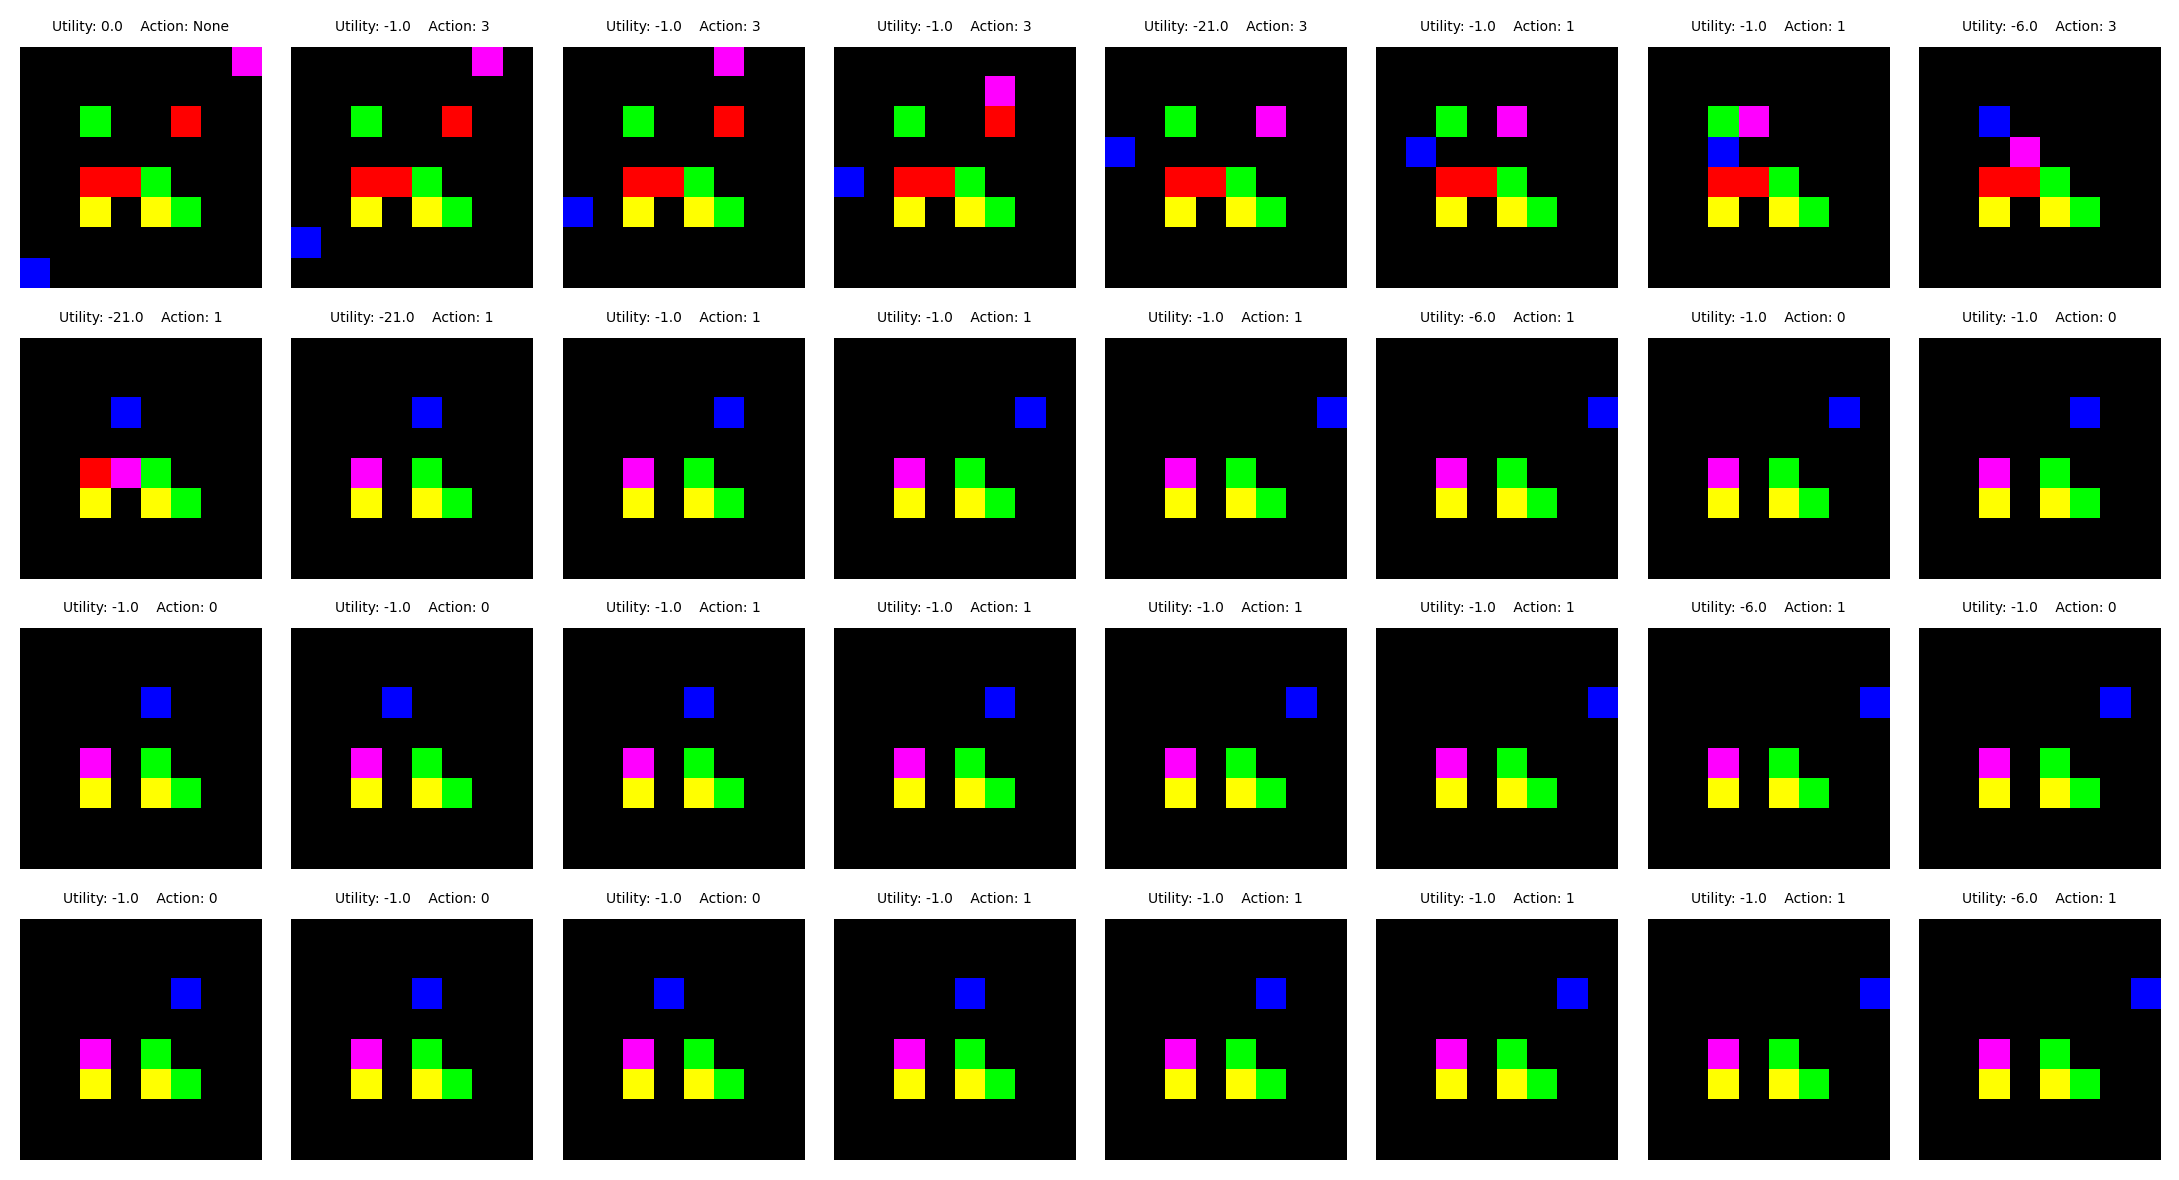

In [4]:
utils.run_and_render_episode(env, eager_py_policy)

In [13]:
env._utility_repr

array([-0.025, -0.125,  0.125, -0.375,  0.   ,  0.   ], dtype=float32)

In [14]:
env._prev_step_utility

-146.0

In [5]:
utils.evaluate_average_utility(env, eager_py_policy, 1000)

-65.649

In [ ]:
utils.run_and_render_episode(env, random_policy)